A: C <br>
B: C E <br>
C: A B D F<br>
D: C F<br>
E: B F G<br>
F: C D E H J L<br>
G: E J<br>
H: F<br>
I: J<br>
J: G I<br>
K: L<br>
L: F K M N P<br>
M: L<br>
N: L P<br>
P: L N Q R <br>
Q: P R T S<br>
R: P Q T<br>
S: Q U<br>
T: Q R<br>
U: S

In [2]:
# floor 0
edges = [
    ("0.1", "0.2"),
    ("0.1", "0.3"),
    ("0.1", "1.15"),
    ("0.1", "gthall"),
    ("0.1", "3.1"),
    ("0.2", "0.3"),
    ("0.3", "0.4"),
    ("0.4", "0.5"),
    ("0.5", "0.6"),
    ("0.6", "1.11"),
    ("0.6", "2.9"),
    ("0.7", "1.1"),
    ("0.7", "2.1"),
    ("0.7", "Entrance"),     
    ("0.7", "0.9"),
    ("0.8", "0.9"),
    ("0.9", "0.10"),
    ("0.11", "0.12"),
    ("0.11", "0.13"),
    ("0.12", "0.13"),
    ("0.13", "1.10"),
    ("0.13", "gthall"),
    ("0.13", "3.3"),
]



In [4]:
# floor 1
edges += [
    ("1.1", "1.2"),
    ("1.1", "2.1"),     
    ("1.2", "1.3"),
    ("1.2", "1.4"),
    ("1.3", "1.4"),
    ("1.4", "1.5"),
    ("1.4", "1.6"),
    ("1.4", "1.7"),
    ("1.7", "1.8"),
    ("1.7", "1.9"),
    ("1.9", "1.10"),
    ("1.10", "gthall"),
    ("1.10", "3.3"),
    ("1.11", "2.9"),    
    ("1.11", "1.12"),
    ("1.12", "1.13"),
    ("1.13", "1.14"),
    ("1.13", "1.15"),
    ("1.14", "1.15"),
    ("1.15", "gthall"), 
    ("1.15", "3.1"),   
]


In [5]:
# floor 2
edges += [
    ("2.1", "gohonour"),
    ("2.1", "2.3"),    
    ("2.2", "2.3"),
    ("2.3", "2.4"),
    ("2.4", "2.5"),
    ("2.5", "2.6"),
    ("2.5", "2.7"),
    ("2.6", "2.7"),
    ("2.6", "2.8"),
    ("2.8", "gthall"),    
    ("gthall", "3.3"),
    ("gthall", "3.1"),
    ("gthall", "gohonour"),
    ("gthall", "2.16"),  
    ("2.9", "gohonour"), 
    ("2.9", "2.11"),
    ("2.9", "3.1"),     
    ("2.10", "2.11"),
    ("2.11", "2.12"),
    ("2.12", "2.13"),
    ("2.13", "2.14"),
    ("2.13", "2.15"),
    ("2.14", "2.15"),
    ("2.14", "2.16"),
]


In [6]:
# floor 3
edges += [
    ("3.1", "3.2"),
    ("3.3", "3.4"),     
]


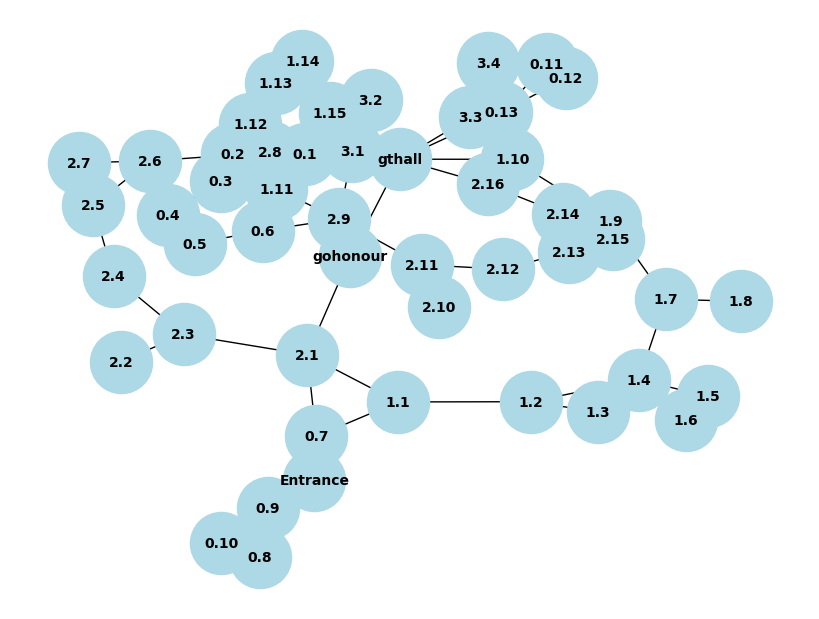

(51, 70)

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
g = nx.Graph()
# Add edges to the graph
g.add_edges_from(edges)

# Count nodes and edges
num_nodes = g.number_of_nodes()
num_edges = g.number_of_edges()

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(g, with_labels=True, node_color='lightblue', font_size=10, node_size=2000, font_color='black', font_weight='bold')
plt.show()

num_nodes, num_edges